In [ ]:
!pip install transformers emot datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.2 MB 4.3 MB/s 
     |████████████████████████████████| 61 kB 23 kB/s 
     |████████████████████████████████| 346 kB 72.8 MB/s 
     |████████████████████████████████| 86 kB 6.2 MB/s 
     |████████████████████████████████| 596 kB 66.0 MB/s 
     |████████████████████████████████| 6.6 MB 58.5 MB/s 
     |████████████████████████████████| 140 kB 76.1 MB/s 
     |████████████████████████████████| 1.1 MB 57.6 MB/s 
     |████████████████████████████████| 212 kB 77.6 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 127 kB 14.9 MB/s 
     |████████████████████████████████| 94 kB 2.4 MB/s 
     |████████████████████████████████| 144 kB 63.7 MB/s 
     |████████████████████████████████| 271 kB 57.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling ur

In [ ]:
# to remove emojis
import re
import pickle
from emot.emo_unicode import UNICODE_EMOJI,EMOTICONS_EMO
# import transformers 
import nltk
import pandas as pd
# from nltk.corpus import stopwords
from transformers import AutoTokenizer
from datasets import load_dataset

from torch import device
from datasets import load_dataset
from torch.utils.data import DataLoader
from torch.cuda import is_available
import torch
from tqdm.auto import tqdm

from google.colab import drive
drive.mount("/content/drive")



Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/veriseti/"
dataset = load_dataset("csv", data_files = path  + "toplam_set_103303.csv")
# dataset = load_dataset("csv", data_files = path  + "elbise_12890.csv")

Using custom data configuration default-6f5b796872312ee0


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-6f5b796872312ee0/0.0.0/433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

from nltk.util import print_string
def tokenize_function(example, max_length = 60):
    
    for i in range(len(example["text"])):
      # print("i:",i,example["text"][i], " boyutu: ",len(example["text"][i]))
      # print("\nÖnişlemeden önce : ",example["text"][i])
       
      example["text"][i] = remove_emoji(example["text"][i].lower())
      # 
      # print("Önişlemeden sonra: ",example["text"][i])
      # print("i:",i,example["text"][i], " boyutu: ",len(example["text"][i]))
       
    
    # for i in range(len(example["text"])):
    #   print("i:",i,example["text"][i], " boyutu: ",len(example["text"][i]))

    encoded_input = tokenizer(example["text"], padding = "max_length", truncation = True, 
                              max_length = max_length)
    # print(type(  encoded_input.input_ids ))
    # print(type({"input_ids": encoded_input.input_ids, "attention_mask": encoded_input.attention_mask}))
    return {"input_ids": encoded_input.input_ids, "attention_mask": encoded_input.attention_mask}
  

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-uncased")

Downloading:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/385 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/256k [00:00<?, ?B/s]

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['pos', 'text'],
        num_rows: 103303
    })
})

In [ ]:
# trainset = dataset["train"].map(tokenize_function)
#dataset içine göre değişcek
trainset = dataset["train"].map(tokenize_function, batched = True)

  0%|          | 0/104 [00:00<?, ?ba/s]

In [ ]:
trainset

Dataset({
    features: ['pos', 'text', 'input_ids', 'attention_mask'],
    num_rows: 103303
})

In [ ]:
batch_size = 1024
trainset = trainset.remove_columns(["text"]) 
trainset.set_format("torch") 
train_loader = DataLoader(trainset, batch_size = batch_size, drop_last = True) 

In [ ]:
trainset['pos']

tensor([1, 1, 1,  ..., 0, 0, 0])

In [ ]:
for batch in train_loader:
  break
batch

{'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         ...,
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0],
         [1, 1, 1,  ..., 0, 0, 0]]),
 'input_ids': tensor([[    2,  6191,  4709,  ...,     0,     0,     0],
         [    2,  7147,  3678,  ...,     0,     0,     0],
         [    2,  6191, 14533,  ...,     0,     0,     0],
         ...,
         [    2, 31069,  1014,  ...,     0,     0,     0],
         [    2, 14533,  1993,  ...,     0,     0,     0],
         [    2,  3452,  2046,  ...,     0,     0,     0]]),
 'pos': tensor([1, 1, 1,  ..., 1, 1, 1])}

In [ ]:
from transformers import BertModel

model = BertModel.from_pretrained("dbmdz/bert-base-turkish-uncased")

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-base-turkish-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
cuda_device = device("cuda") if is_available() else device("cpu")
model.to(cuda_device)
model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(32000, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [ ]:
def get_vectors(loader):
  cls_outputs = torch.zeros(len(loader) * batch_size, 768)
  progress_bar = tqdm(range(len(loader)))

  for i, batch in enumerate(loader):
    with torch.no_grad():
      b_input_ids = batch["input_ids"].to(cuda_device)
      b_attn_mask = batch["attention_mask"].to(cuda_device)
      outputs = model(b_input_ids, b_attn_mask)
      cls_outputs[batch_size*i: batch_size*(i+1)] = outputs[1]
      progress_bar.update(1)
  return cls_outputs

In [ ]:
trainset_vectors = get_vectors(train_loader)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
trainset_vectors.shape

torch.Size([102400, 768])

In [ ]:
trainset_labels = [int(label) for batch in train_loader for label in batch["pos"]]

# buraya kadar bert vektörleri elde etmeliydik: bundan sonra Modeller tanımlanıyor

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score, f1_score,classification_report, confusion_matrix,roc_auc_score, recall_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm_clf = make_pipeline(StandardScaler(), SVC())

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression( )

In [ ]:
def print_ort():    
    print(scores)
    print(' SVM__Avg. accuracy score :' + str(np.mean(scores)))
    print(scoresf1)
    print(' SVM__Avg. F1 score :' + str(np.mean(scoresf1)))
    print(scores_recall)
    print(' SVM__Avg. Recall score :' + str(np.mean(scores_recall)))
    print(scores_roc)
    print(' SVM__Avg. ROC score :' + str(np.mean(scores_roc)))
    print(scores_pres)
    print(' SVM__Avg. Pressicion score :' + str(np.mean(scores_pres)))

## **LR K fold başlangıç**

In [ ]:
# !nvidia-smi

Sun May 29 21:32:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    38W / 250W |   5123MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
folds = KFold(n_splits = 10, shuffle = True, random_state = None)
X, y = trainset_vectors,trainset_labels 
y = np.array(y)

scores = []
scoresf1 = []
scores_recall =[]
scores_pres =[]
scores_roc=[]
TPs= []
FPs= []
FNs= []
TNs= []

In [ ]:
for n_fold, (train_index, valid_index) in enumerate(folds.split(trainset_vectors,trainset_labels )):
    print('\n Fold '+ str(n_fold+1 ) + 
          ' \n\n train ids :' +  str(train_index) +
          ' \n\n validation ids :' +  str(valid_index))
    
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    lr_clf.fit(X_train, y_train)
    y_pred = lr_clf.predict(X_valid)
    
    acc_score = accuracy_score(y_valid, y_pred)
    f1score = f1_score(y_valid, y_pred)
    scorerecall= recall_score(y_valid, y_pred)
    scorepres= precision_score(y_valid, y_pred)
    scoreroc= roc_auc_score(y_valid, y_pred)
    scores.append(acc_score)
    scoresf1.append(f1score)
    scores_recall.append(scorerecall)
    scores_pres.append(scorepres)
    scores_roc.append(scoreroc)
    print('\n Accuracy score for Fold ' +str(n_fold+1) + ' --> ' + str(acc_score)+' ')
    print('\n F1 score for Fold ' +str(n_fold+1) + ' --> ' + str(f1score)+' ')
    print('\n Recall score for Fold ' +str(n_fold+1) + ' --> ' + str( scorerecall)+' ')
    print('\n ROC score for Fold ' +str(n_fold+1) + ' --> ' + str(scoreroc)+' ')
    print('\n Pressicion score for Fold ' +str(n_fold+1) + ' --> ' + str(scorepres)+'\n') 

    con =confusion_matrix(y_valid, y_pred)
    TPs.append(con[0][0])
    FPs.append(con[0][1])
    FNs.append(con[1][0])
    TNs.append(con[1][1])
    print("\n Confusion Matrix : ")
    print(con)
    print_ort()


 Fold 1 

 train ids :[     0      1      2 ... 102396 102397 102398] 

 validation ids :[    20     31     82 ... 102382 102389 102399]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



 Accuracy score for Fold 1 --> 0.913671875 

 F1 score for Fold 1 --> 0.9167294649585531 

 Recall score for Fold 1 --> 0.9170750094232943 

 ROC score for Fold 1 --> 0.9135435849710716 

 Pressicion score for Fold 1 --> 0.9163841807909604


 Confusion Matrix : 
[[4490  444]
 [ 440 4866]]
[0.913671875]
 SVM__Avg. accuracy score :0.913671875
[0.9167294649585531]
 SVM__Avg. F1 score :0.9167294649585531
[0.9170750094232943]
 SVM__Avg. Recall score :0.9170750094232943
[0.9135435849710716]
 SVM__Avg. ROC score :0.9135435849710716
[0.9163841807909604]
 SVM__Avg. Pressicion score :0.9163841807909604

 Fold 2 

 train ids :[     0      1      2 ... 102395 102397 102399] 

 validation ids :[     7     14     28 ... 102390 102396 102398]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



 Accuracy score for Fold 2 --> 0.9109375 

 F1 score for Fold 2 --> 0.9128440366972477 

 Recall score for Fold 2 --> 0.9193455245428297 

 ROC score for Fold 2 --> 0.9108125045905426 

 Pressicion score for Fold 2 --> 0.906433858417157


 Confusion Matrix : 
[[4552  493]
 [ 419 4776]]
[0.913671875, 0.9109375]
 SVM__Avg. accuracy score :0.9123046875
[0.9167294649585531, 0.9128440366972477]
 SVM__Avg. F1 score :0.9147867508279004
[0.9170750094232943, 0.9193455245428297]
 SVM__Avg. Recall score :0.9182102669830621
[0.9135435849710716, 0.9108125045905426]
 SVM__Avg. ROC score :0.9121780447808071
[0.9163841807909604, 0.906433858417157]
 SVM__Avg. Pressicion score :0.9114090196040587

 Fold 3 

 train ids :[     1      2      3 ... 102397 102398 102399] 

 validation ids :[     0      4      8 ... 102375 102383 102392]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



 Accuracy score for Fold 3 --> 0.91767578125 

 F1 score for Fold 3 --> 0.9200417338518447 

 Recall score for Fold 3 --> 0.9190828122039038 

 ROC score for Fold 3 --> 0.9176312711029593 

 Pressicion score for Fold 3 --> 0.9210026585643752


 Confusion Matrix : 
[[4547  416]
 [ 427 4850]]
[0.913671875, 0.9109375, 0.91767578125]
 SVM__Avg. accuracy score :0.9140950520833334
[0.9167294649585531, 0.9128440366972477, 0.9200417338518447]
 SVM__Avg. F1 score :0.9165384118358819
[0.9170750094232943, 0.9193455245428297, 0.9190828122039038]
 SVM__Avg. Recall score :0.9185011153900092
[0.9135435849710716, 0.9108125045905426, 0.9176312711029593]
 SVM__Avg. ROC score :0.9139957868881913
[0.9163841807909604, 0.906433858417157, 0.9210026585643752]
 SVM__Avg. Pressicion score :0.9146068992574975

 Fold 4 

 train ids :[     0      1      2 ... 102397 102398 102399] 

 validation ids :[    13     47     71 ... 102361 102370 102385]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



 Accuracy score for Fold 4 --> 0.9109375 

 F1 score for Fold 4 --> 0.9149888143176734 

 Recall score for Fold 4 --> 0.9184131736526946 

 ROC score for Fold 4 --> 0.9105954757152362 

 Pressicion score for Fold 4 --> 0.9115898959881129


 Confusion Matrix : 
[[4420  476]
 [ 436 4908]]
[0.913671875, 0.9109375, 0.91767578125, 0.9109375]
 SVM__Avg. accuracy score :0.9133056640625001
[0.9167294649585531, 0.9128440366972477, 0.9200417338518447, 0.9149888143176734]
 SVM__Avg. F1 score :0.9161510124563298
[0.9170750094232943, 0.9193455245428297, 0.9190828122039038, 0.9184131736526946]
 SVM__Avg. Recall score :0.9184791299556806
[0.9135435849710716, 0.9108125045905426, 0.9176312711029593, 0.9105954757152362]
 SVM__Avg. ROC score :0.9131457090949525
[0.9163841807909604, 0.906433858417157, 0.9210026585643752, 0.9115898959881129]
 SVM__Avg. Pressicion score :0.9138526484401513

 Fold 5 

 train ids :[     0      2      3 ... 102396 102398 102399] 

 validation ids :[     1      5      9 ... 10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



 Accuracy score for Fold 5 --> 0.90927734375 

 F1 score for Fold 5 --> 0.9117004087063968 

 Recall score for Fold 5 --> 0.9128283212790255 

 ROC score for Fold 5 --> 0.9091819103386704 

 Pressicion score for Fold 5 --> 0.9105752800455668


 Confusion Matrix : 
[[4515  471]
 [ 458 4796]]
[0.913671875, 0.9109375, 0.91767578125, 0.9109375, 0.90927734375]
 SVM__Avg. accuracy score :0.9125000000000002
[0.9167294649585531, 0.9128440366972477, 0.9200417338518447, 0.9149888143176734, 0.9117004087063968]
 SVM__Avg. F1 score :0.9152608917063432
[0.9170750094232943, 0.9193455245428297, 0.9190828122039038, 0.9184131736526946, 0.9128283212790255]
 SVM__Avg. Recall score :0.9173489682203495
[0.9135435849710716, 0.9108125045905426, 0.9176312711029593, 0.9105954757152362, 0.9091819103386704]
 SVM__Avg. ROC score :0.912352949343696
[0.9163841807909604, 0.906433858417157, 0.9210026585643752, 0.9115898959881129, 0.9105752800455668]
 SVM__Avg. Pressicion score :0.9131971747612344

 Fold 6 

 train id

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



 Accuracy score for Fold 6 --> 0.90830078125 

 F1 score for Fold 6 --> 0.911087965154815 

 Recall score for Fold 6 --> 0.9104844814534444 

 ROC score for Fold 6 --> 0.908228519984188 

 Pressicion score for Fold 6 --> 0.9116922493841197


 Confusion Matrix : 
[[4490  466]
 [ 473 4811]]
[0.913671875, 0.9109375, 0.91767578125, 0.9109375, 0.90927734375, 0.90830078125]
 SVM__Avg. accuracy score :0.9118001302083335
[0.9167294649585531, 0.9128440366972477, 0.9200417338518447, 0.9149888143176734, 0.9117004087063968, 0.911087965154815]
 SVM__Avg. F1 score :0.9145654039477552
[0.9170750094232943, 0.9193455245428297, 0.9190828122039038, 0.9184131736526946, 0.9128283212790255, 0.9104844814534444]
 SVM__Avg. Recall score :0.916204887092532
[0.9135435849710716, 0.9108125045905426, 0.9176312711029593, 0.9105954757152362, 0.9091819103386704, 0.908228519984188]
 SVM__Avg. ROC score :0.9116655444504446
[0.9163841807909604, 0.906433858417157, 0.9210026585643752, 0.9115898959881129, 0.910575280045566

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



 Accuracy score for Fold 7 --> 0.9140625 

 F1 score for Fold 7 --> 0.9174948434277143 

 Recall score for Fold 7 --> 0.9232075471698113 

 ROC score for Fold 7 --> 0.9137292796577802 

 Pressicion score for Fold 7 --> 0.9118524040253447


 Confusion Matrix : 
[[4467  473]
 [ 407 4893]]
[0.913671875, 0.9109375, 0.91767578125, 0.9109375, 0.90927734375, 0.90830078125, 0.9140625]
 SVM__Avg. accuracy score :0.9121233258928573
[0.9167294649585531, 0.9128440366972477, 0.9200417338518447, 0.9149888143176734, 0.9117004087063968, 0.911087965154815, 0.9174948434277143]
 SVM__Avg. F1 score :0.9149838953020349
[0.9170750094232943, 0.9193455245428297, 0.9190828122039038, 0.9184131736526946, 0.9128283212790255, 0.9104844814534444, 0.9232075471698113]
 SVM__Avg. Recall score :0.917205267103572
[0.9135435849710716, 0.9108125045905426, 0.9176312711029593, 0.9105954757152362, 0.9091819103386704, 0.908228519984188, 0.9137292796577802]
 SVM__Avg. ROC score :0.9119603637657783
[0.9163841807909604, 0.90643

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



 Accuracy score for Fold 8 --> 0.91953125 

 F1 score for Fold 8 --> 0.9219253363653592 

 Recall score for Fold 8 --> 0.9240265906932573 

 ROC score for Fold 8 --> 0.9194002300199955 

 Pressicion score for Fold 8 --> 0.9198336169408206


 Confusion Matrix : 
[[4551  424]
 [ 400 4865]]
[0.913671875, 0.9109375, 0.91767578125, 0.9109375, 0.90927734375, 0.90830078125, 0.9140625, 0.91953125]
 SVM__Avg. accuracy score :0.9130493164062501
[0.9167294649585531, 0.9128440366972477, 0.9200417338518447, 0.9149888143176734, 0.9117004087063968, 0.911087965154815, 0.9174948434277143, 0.9219253363653592]
 SVM__Avg. F1 score :0.9158515754349505
[0.9170750094232943, 0.9193455245428297, 0.9190828122039038, 0.9184131736526946, 0.9128283212790255, 0.9104844814534444, 0.9232075471698113, 0.9240265906932573]
 SVM__Avg. Recall score :0.9180579325522826
[0.9135435849710716, 0.9108125045905426, 0.9176312711029593, 0.9105954757152362, 0.9091819103386704, 0.908228519984188, 0.9137292796577802, 0.9194002300199

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,



 Accuracy score for Fold 9 --> 0.917578125 

 F1 score for Fold 9 --> 0.9208700543783986 

 Recall score for Fold 9 --> 0.9266037735849056 

 ROC score for Fold 9 --> 0.9172492552135055 

 Pressicion score for Fold 9 --> 0.915206857994782


 Confusion Matrix : 
[[4485  455]
 [ 389 4911]]
[0.913671875, 0.9109375, 0.91767578125, 0.9109375, 0.90927734375, 0.90830078125, 0.9140625, 0.91953125, 0.917578125]
 SVM__Avg. accuracy score :0.9135525173611112
[0.9167294649585531, 0.9128440366972477, 0.9200417338518447, 0.9149888143176734, 0.9117004087063968, 0.911087965154815, 0.9174948434277143, 0.9219253363653592, 0.9208700543783986]
 SVM__Avg. F1 score :0.9164091842064449
[0.9170750094232943, 0.9193455245428297, 0.9190828122039038, 0.9184131736526946, 0.9128283212790255, 0.9104844814534444, 0.9232075471698113, 0.9240265906932573, 0.9266037735849056]
 SVM__Avg. Recall score :0.9190074704447964
[0.9135435849710716, 0.9108125045905426, 0.9176312711029593, 0.9105954757152362, 0.9091819103386704, 0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(scores)
print(' SVM__Avg. accuracy score :' + str(np.mean(scores)))
print(scoresf1)
print(' SVM__Avg. F1 score :' + str(np.mean(scoresf1)))
print(scores_recall)
print(' SVM__Avg. Recall score :' + str(np.mean(scores_recall)))
print(scores_roc)
print(' SVM__Avg. ROC score :' + str(np.mean(scores_roc)))
print(scores_pres)
print(' SVM__Avg. Pressicion score :' + str(np.mean(scores_pres)))

[0.913671875, 0.9109375, 0.91767578125, 0.9109375, 0.90927734375, 0.90830078125, 0.9140625, 0.91953125, 0.917578125, 0.91533203125]
 SVM__Avg. accuracy score :0.9137304687500001
[0.9167294649585531, 0.9128440366972477, 0.9200417338518447, 0.9149888143176734, 0.9117004087063968, 0.911087965154815, 0.9174948434277143, 0.9219253363653592, 0.9208700543783986, 0.9171365765076938]
 SVM__Avg. F1 score :0.9164819234365698
[0.9170750094232943, 0.9193455245428297, 0.9190828122039038, 0.9184131736526946, 0.9128283212790255, 0.9104844814534444, 0.9232075471698113, 0.9240265906932573, 0.9266037735849056, 0.9175750621533754]
 SVM__Avg. Recall score :0.9188642296156543
[0.9135435849710716, 0.9108125045905426, 0.9176312711029593, 0.9105954757152362, 0.9091819103386704, 0.908228519984188, 0.9137292796577802, 0.9194002300199955, 0.9172492552135055, 0.9152832405159214]
 SVM__Avg. ROC score :0.913565527210987
[0.9163841807909604, 0.906433858417157, 0.9210026585643752, 0.9115898959881129, 0.910575280045566

[[4509.2  455.4]
 [ 428.  4847.4]]


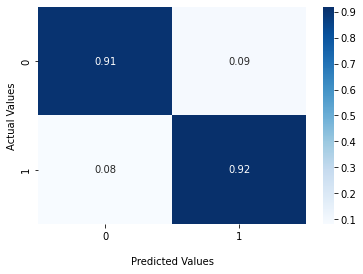

In [ ]:
conf_mat  = np.empty((2, 2), float)
conf_mat[0][0]=np.mean(TPs)
conf_mat[0][1]=np.mean(FPs)
conf_mat[1][0]=np.mean(FNs)
conf_mat[1][1]=np.mean(TNs)

table = sns.heatmap(conf_mat/np.sum(conf_mat, axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')

print(conf_mat )
table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

In [ ]:
!nvidia-smi

Sun May 29 21:34:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    35W / 250W |   5123MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **SVM K fold başlangıç**

In [ ]:
folds = KFold(n_splits = 10, shuffle = True, random_state = None)
X, y = trainset_vectors,trainset_labels 
y = np.array(y)

scores = []
scoresf1 = []
scores_recall =[]
scores_pres =[]
scores_roc=[]
TPs= []
FPs= []
FNs= []
TNs= []

In [ ]:
for n_fold, (train_index, valid_index) in enumerate(folds.split(X, y)):
    print('\n Fold '+ str(n_fold+1 ) + 
          ' \n\n train ids :' +  str(train_index) +
          ' \n\n validation ids :' +  str(valid_index))
    
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]
    
    svm_clf.fit(X_train, y_train)
    y_pred = svm_clf.predict(X_valid)
    
    acc_score = accuracy_score(y_valid, y_pred)
    f1score = f1_score(y_valid, y_pred)
    scorerecall= recall_score(y_valid, y_pred)
    scorepres= precision_score(y_valid, y_pred)
    scoreroc= roc_auc_score(y_valid, y_pred)
    scores.append(acc_score)
    scoresf1.append(f1score)
    scores_recall.append(scorerecall)
    scores_pres.append(scorepres)
    scores_roc.append(scoreroc)
    print('\n Accuracy score for Fold ' +str(n_fold+1) + ' --> ' + str(acc_score)+' ')
    print('\n F1 score for Fold ' +str(n_fold+1) + ' --> ' + str(f1score)+' ')
    print('\n Recall score for Fold ' +str(n_fold+1) + ' --> ' + str( scorerecall)+' ')
    print('\n ROC score for Fold ' +str(n_fold+1) + ' --> ' + str(scoreroc)+' ')
    print('\n Pressicion score for Fold ' +str(n_fold+1) + ' --> ' + str(scorepres)+'\n') 

    con =confusion_matrix(y_valid, y_pred)
    TPs.append(con[0][0])
    FPs.append(con[0][1])
    FNs.append(con[1][0])
    TNs.append(con[1][1])
    print("\n Confusion Matrix : ")
    print(con)
    print_ort()


 Fold 1 

 train ids :[     0      1      2 ... 102396 102397 102398] 

 validation ids :[     9     12     40 ... 102386 102395 102399]

 Accuracy score for Fold 1 --> 0.9275390625 

 F1 score for Fold 1 --> 0.9303678678678678 

 Recall score for Fold 1 --> 0.9345776772247361 

 ROC score for Fold 1 --> 0.9272766830207959 

 Pressicion score for Fold 1 --> 0.9261958146487295


 Confusion Matrix : 
[[4541  395]
 [ 347 4957]]
[0.9275390625]
 SVM__Avg. accuracy score :0.9275390625
[0.9303678678678678]
 SVM__Avg. F1 score :0.9303678678678678
[0.9345776772247361]
 SVM__Avg. Recall score :0.9345776772247361
[0.9272766830207959]
 SVM__Avg. ROC score :0.9272766830207959
[0.9261958146487295]
 SVM__Avg. Pressicion score :0.9261958146487295

 Fold 2 

 train ids :[     0      1      2 ... 102396 102397 102399] 

 validation ids :[    44     63     82 ... 102362 102367 102398]

 Accuracy score for Fold 2 --> 0.9337890625 

 F1 score for Fold 2 --> 0.9353670162059105 

 Recall score for Fold 2 --

[[4579.   385.6]
 [ 357.9 4917.5]]


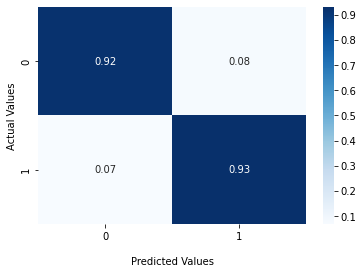

In [ ]:
conf_mat  = np.empty((2, 2), float)
conf_mat[0][0]=np.mean(TPs)
conf_mat[0][1]=np.mean(FPs)
conf_mat[1][0]=np.mean(FNs)
conf_mat[1][1]=np.mean(TNs)

table = sns.heatmap(conf_mat/np.sum(conf_mat, axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')
print(conf_mat )
table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

In [ ]:
print(scores)
print(' SVM__Avg. accuracy score :' + str(np.mean(scores)))
print(scoresf1)
print(' SVM__Avg. F1 score :' + str(np.mean(scoresf1)))
print(scores_recall)
print(' SVM__Avg. Recall score :' + str(np.mean(scores_recall)))
print(scores_roc)
print(' SVM__Avg. ROC score :' + str(np.mean(scores_roc)))
print(scores_pres)
print(' SVM__Avg. Pressicion score :' + str(np.mean(scores_pres)))

[0.9275390625, 0.9337890625, 0.92470703125, 0.922265625, 0.92900390625, 0.92998046875, 0.92490234375, 0.92998046875, 0.9287109375, 0.923046875]
 SVM__Avg. accuracy score :0.927392578125
[0.9303678678678678, 0.9353670162059105, 0.9277887046923293, 0.9243058197033092, 0.930609907416245, 0.9321087018274784, 0.9264185245431059, 0.9325176470588235, 0.931928384930996, 0.9257164404223228]
 SVM__Avg. F1 score :0.9297129014668389
[0.9345776772247361, 0.9382291069038057, 0.927354428009736, 0.9239543726235742, 0.9367794004611837, 0.935385784872672, 0.9263298890164562, 0.9370153205976924, 0.9362937980138655, 0.9257164404223228]
 SVM__Avg. Recall score :0.9321636218146043
[0.9272766830207959, 0.9336924820090771, 0.9245876038803527, 0.9222181501672088, 0.9288742117476689, 0.9298262793387063, 0.9248721642928311, 0.9297432750777682, 0.9283753305794394, 0.9229473612160237]
 SVM__Avg. ROC score :0.9272413541329871
[0.9261958146487295, 0.9325223341570044, 0.928223388305847, 0.9246575342465754, 0.92452114